In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('./Data/dataset83.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display a concise summary of the dataframe
print(df.info())

# Display basic statistical details
print(df.describe())

label_encoder = LabelEncoder()

df['Species'] = label_encoder.fit_transform(df['Species'])
df['Population'] = label_encoder.fit_transform(df['Population'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Converting a column to float
df['Thorax_length'] = pd.to_numeric(df['Thorax_length'], errors='coerce').astype('float64')

# Converting a column to int (after ensuring it's first converted to float to handle non-integer formats)
df['wing_loading'] = pd.to_numeric(df['wing_loading'], errors='coerce').astype('float64')



for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        # Fill missing values with mean for numerical columns
        col_mean = df[col].mean()
        df[col] = df[col].fillna(col_mean)
    elif df[col].dtype == 'object':
        # Fill missing values with mode for categorical columns
        col_mode = df[col].mode()[0]
        df[col] = df[col].fillna(col_mode)

       Species Population  Latitude  Longitude  Year_start  Year_end  \
0  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
1  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
2  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
3  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
4  D._aldrichi    Binjour    -25.52     151.45        1994      1994   

   Temperature  Vial  Replicate     Sex Thorax_length     l2    l3p    l3d  \
0           20     1          1  female         1.238  2.017  0.659  1.711   
1           20     1          1    male         1.113  1.811  0.609  1.539   
2           20     1          2  female         1.215  1.985  0.648  1.671   
3           20     1          2    male         1.123  1.713  0.596  1.495   
4           20     2          1  female         1.218  1.938  0.641  1.658   

     lpd     l3     w1     w2     w3 wing_loading  
0  2.370  2.370  1.032  1.441  1.192        1.

In [3]:
# Counting missing values in each column
print(df.isnull().sum())

# Visualizing missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

Species          0
Population       0
Latitude         0
Longitude        0
Year_start       0
Year_end         0
Temperature      0
Vial             0
Replicate        0
Sex              0
Thorax_length    0
l2               0
l3p              0
l3d              0
lpd              0
l3               0
w1               0
w2               0
w3               0
wing_loading     0
dtype: int64


In [4]:
# Histograms for all numerical features
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots for all numerical features to identify outliers
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15, 10))
plt.suptitle('Boxplots of Numerical Features')
plt.show()

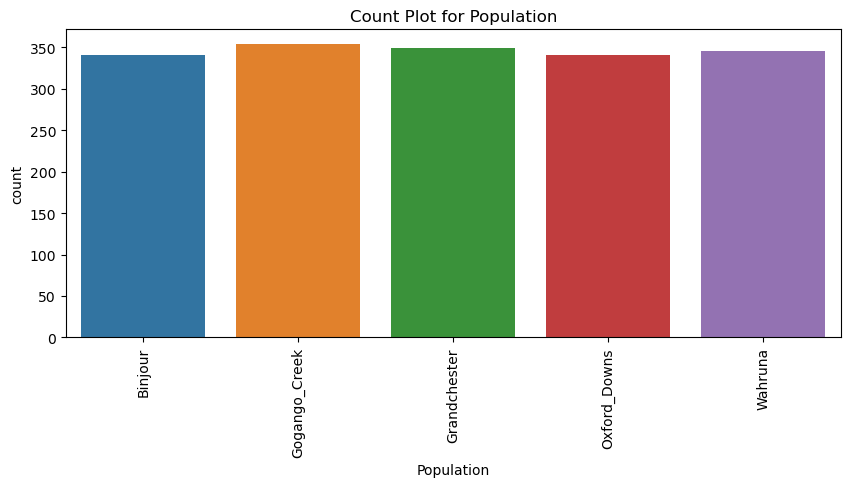

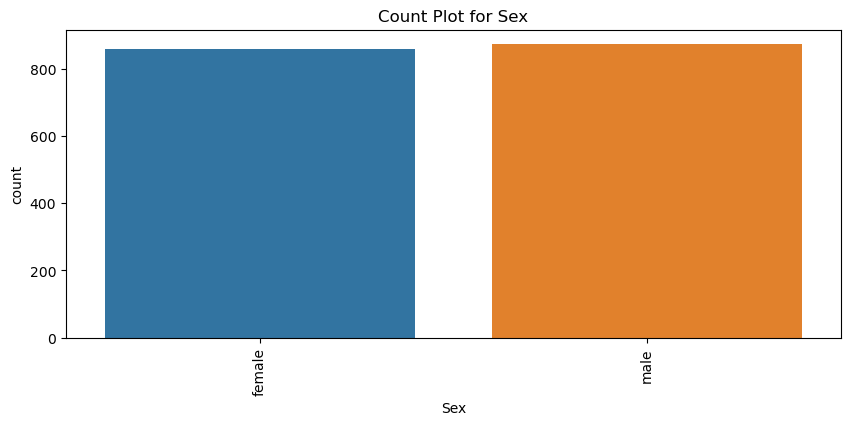

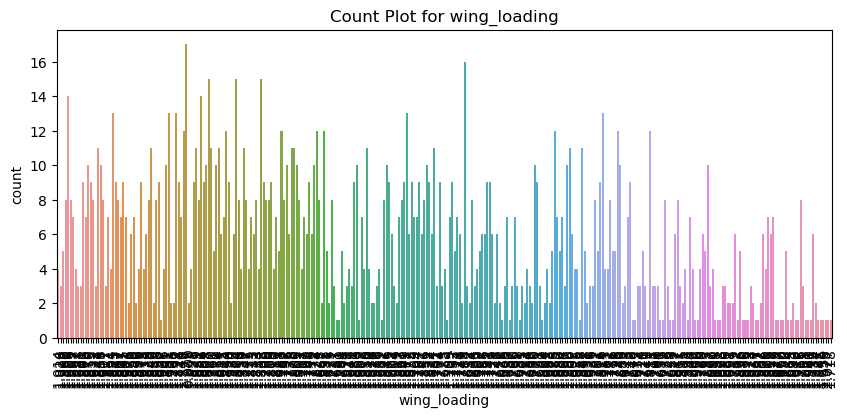

In [5]:
# Count plots for categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=90)
    plt.show()

/home/adam/miniconda3/envs/datascience/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/adam/miniconda3/envs/datascience/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/adam/miniconda3/envs/datascience/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/adam/miniconda3/envs/datascience/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

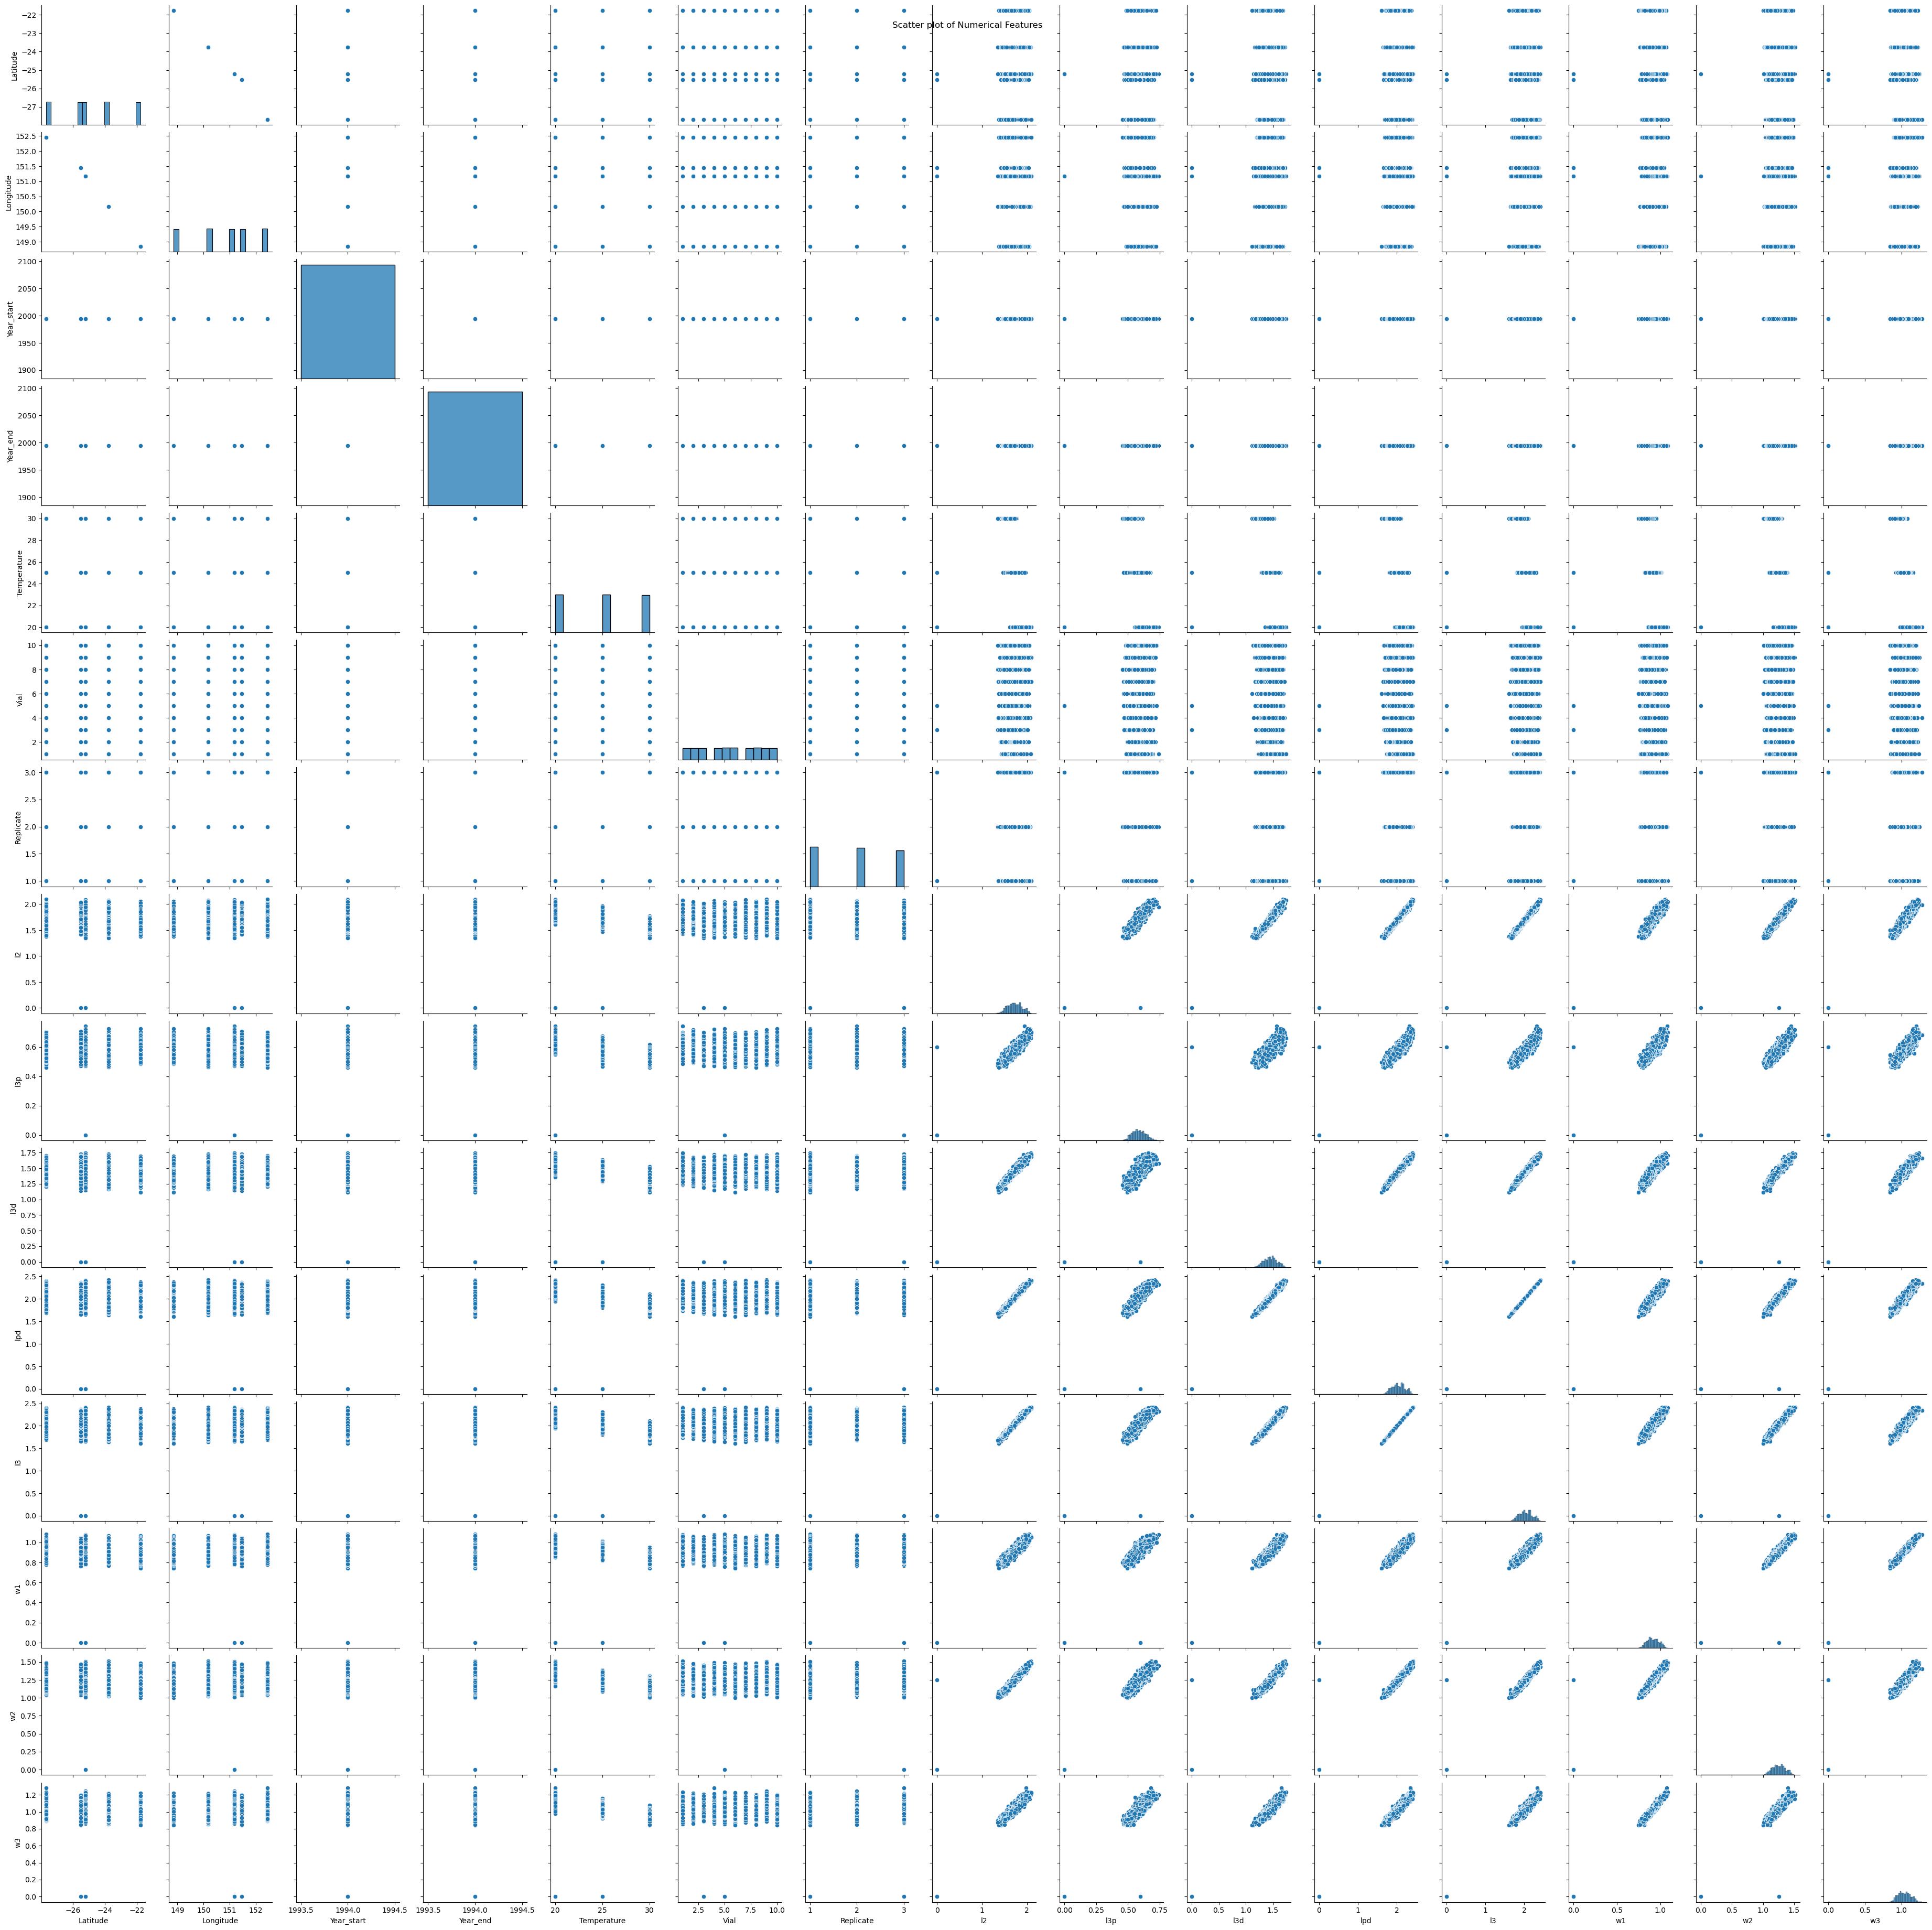

ValueError: could not convert string to float: 'D._aldrichi'

<Figure size 1000x800 with 0 Axes>

In [6]:
# Scatter plots for numerical features
sns.pairplot(df.select_dtypes(include=np.number))
plt.suptitle('Scatter plot of Numerical Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

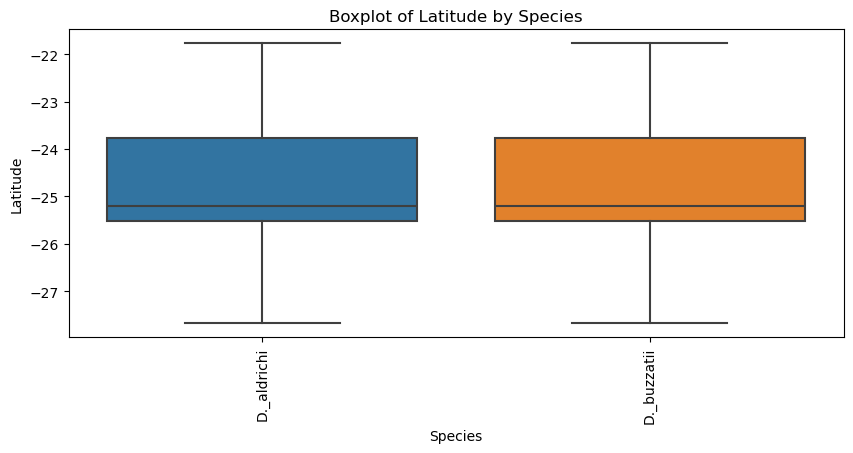

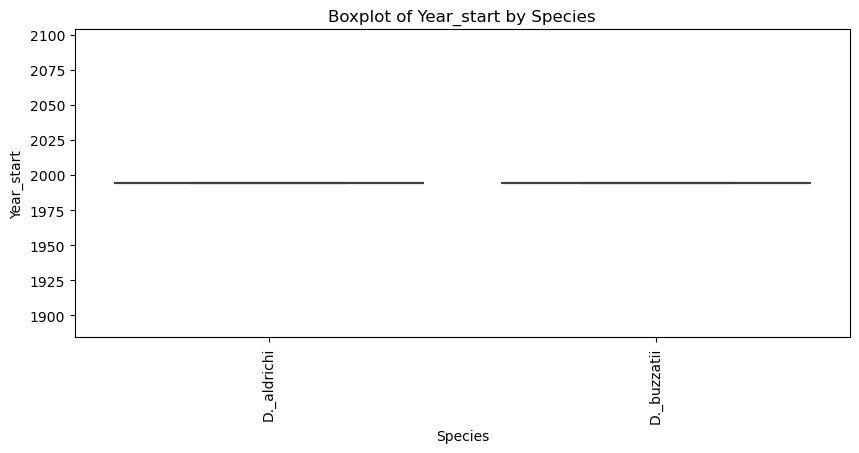

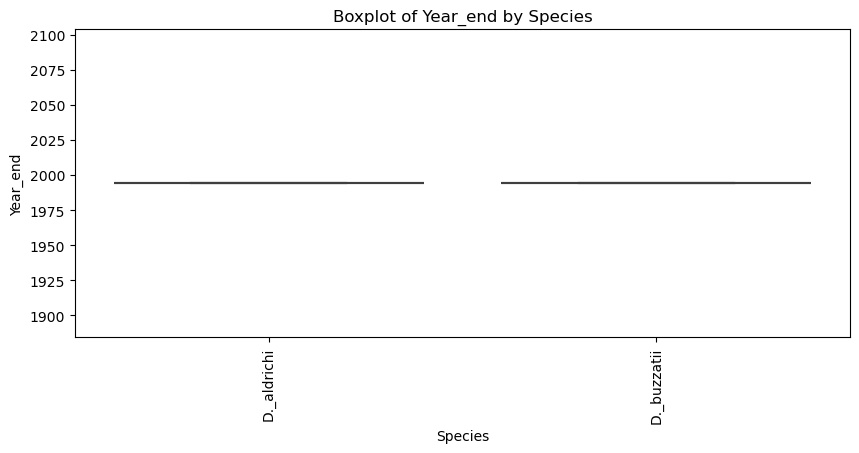

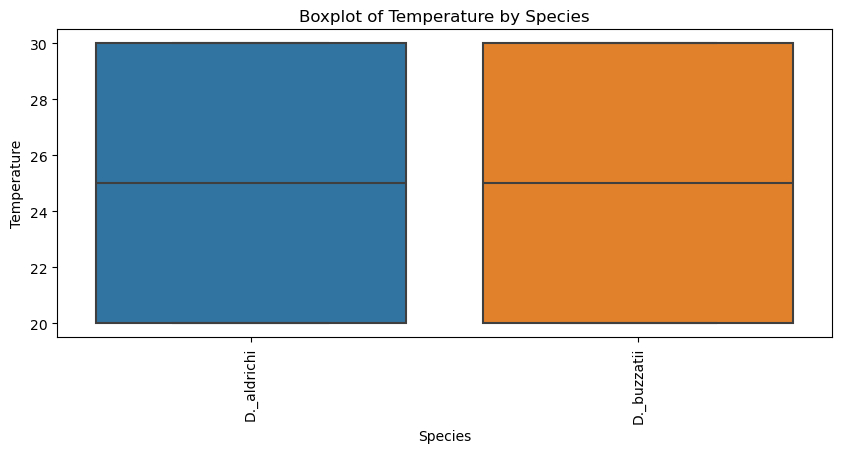

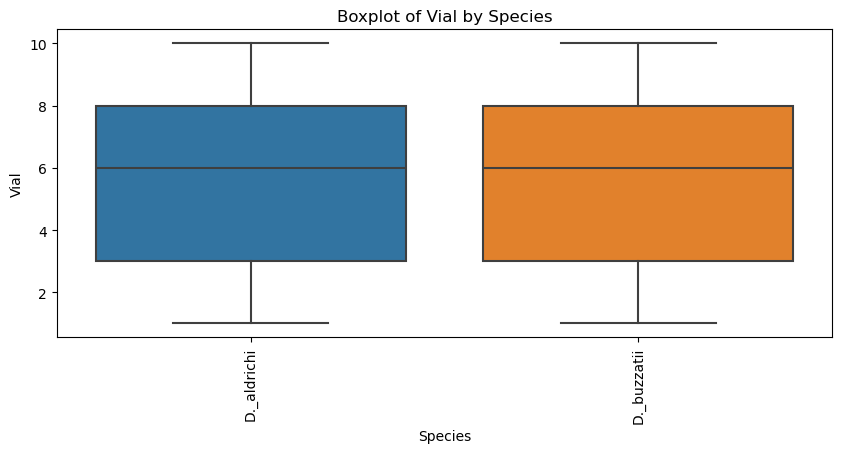

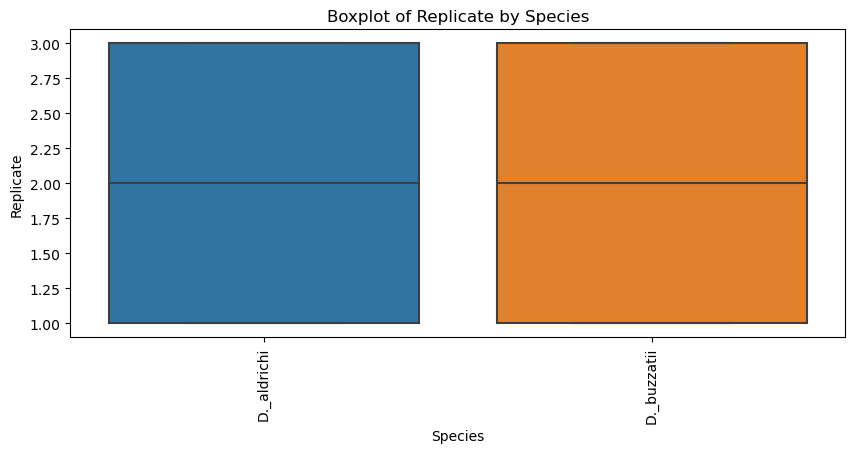

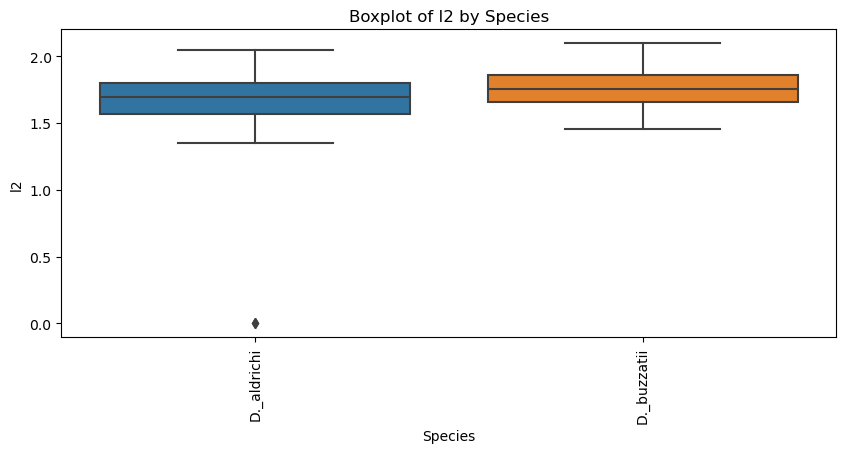

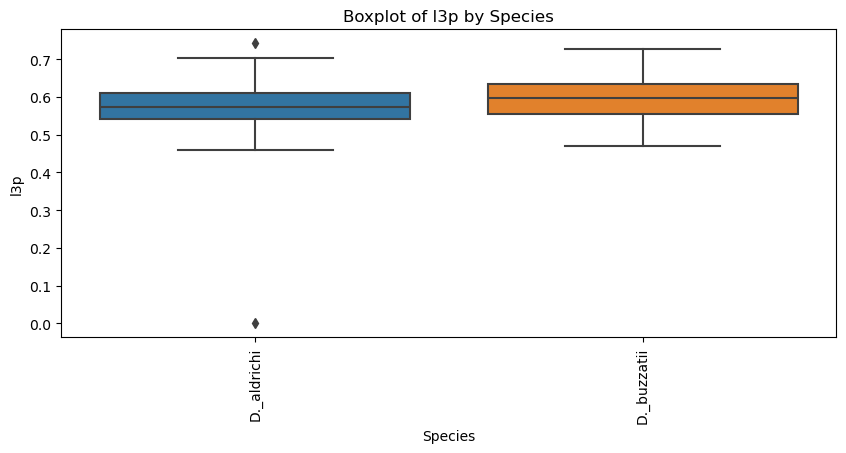

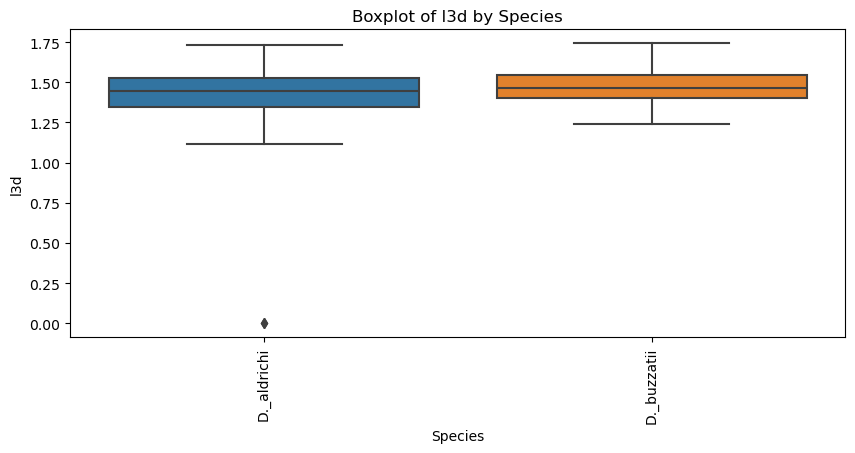

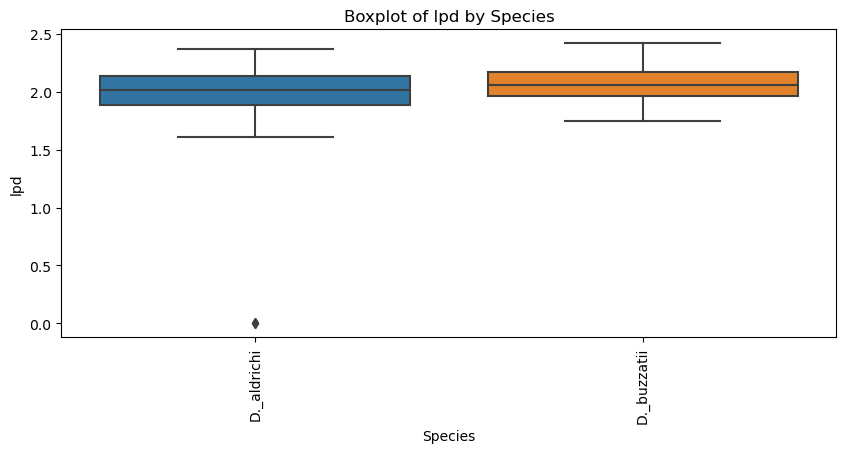

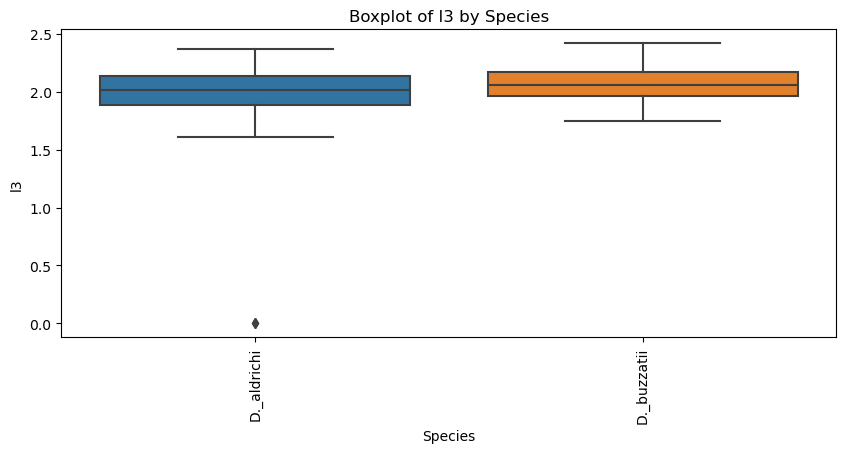

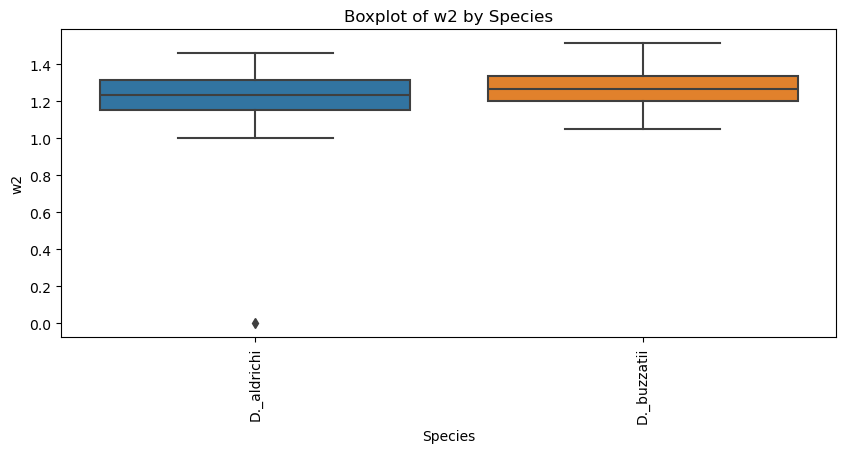

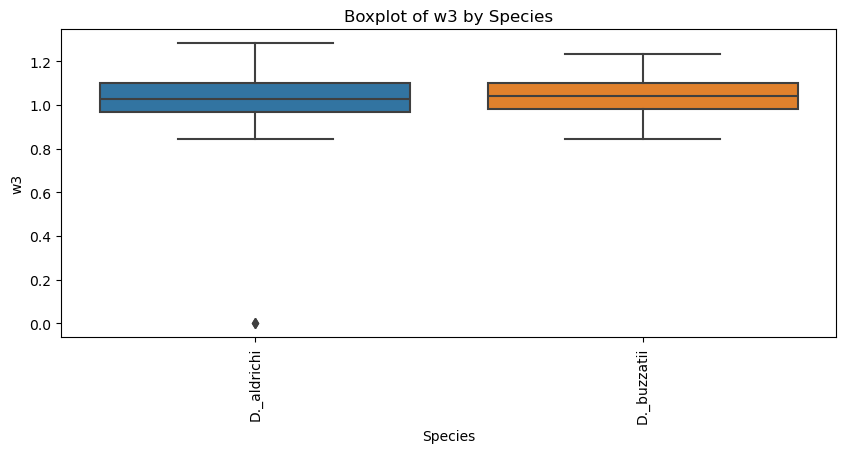

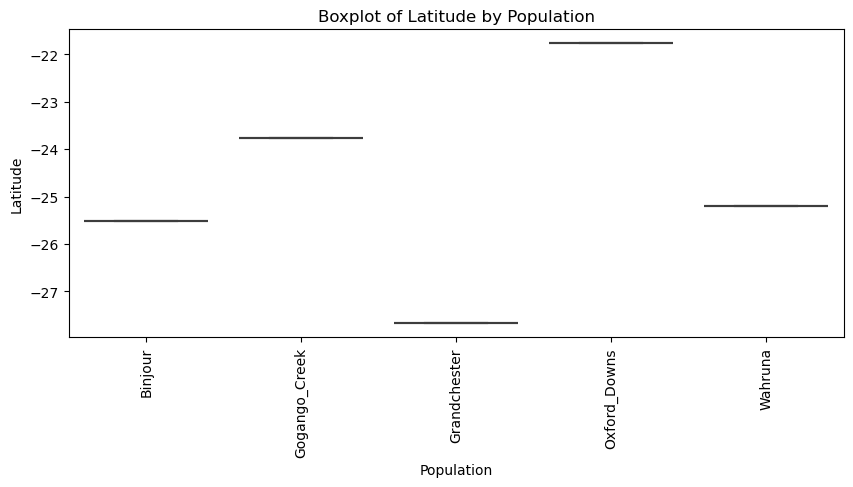

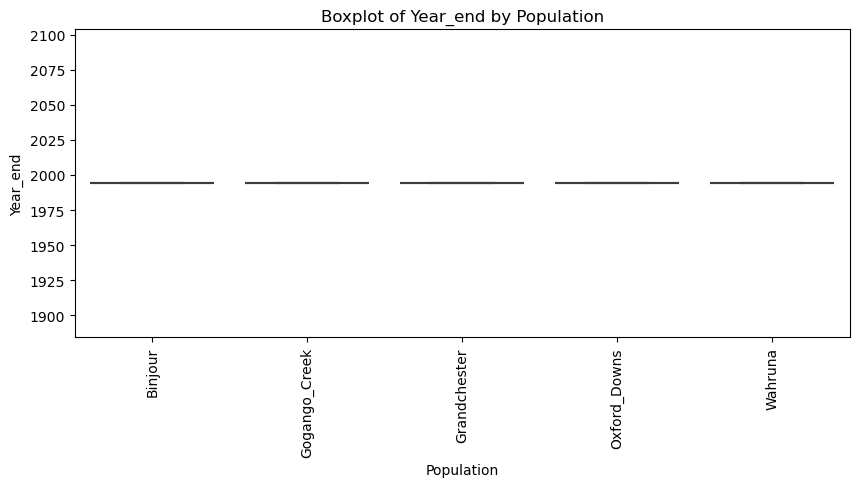

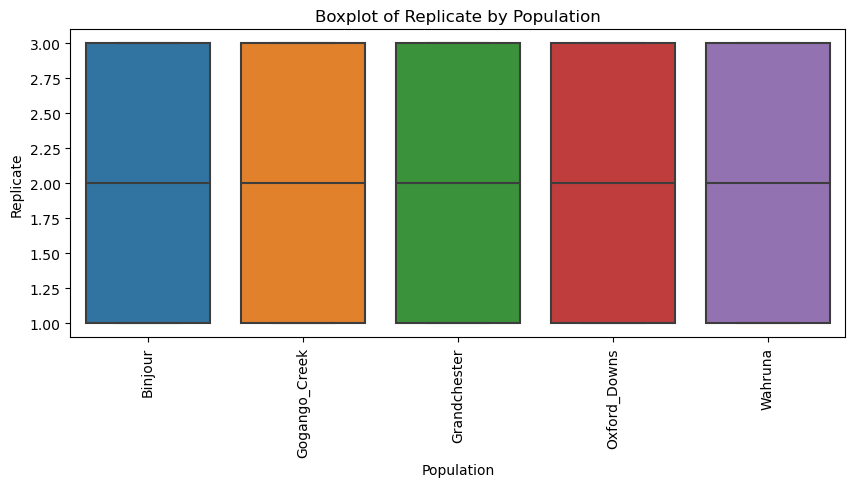

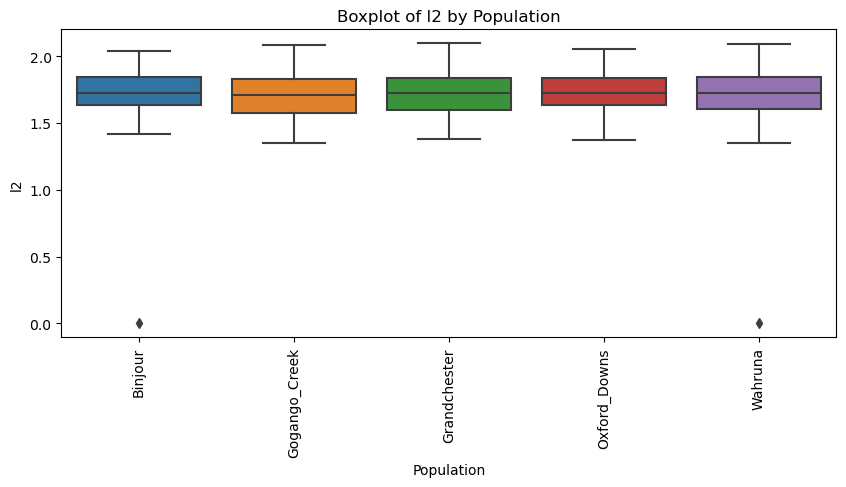

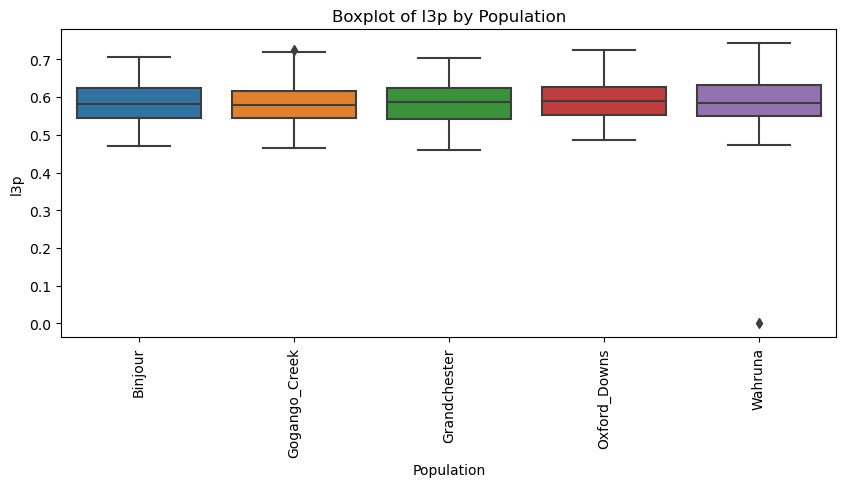

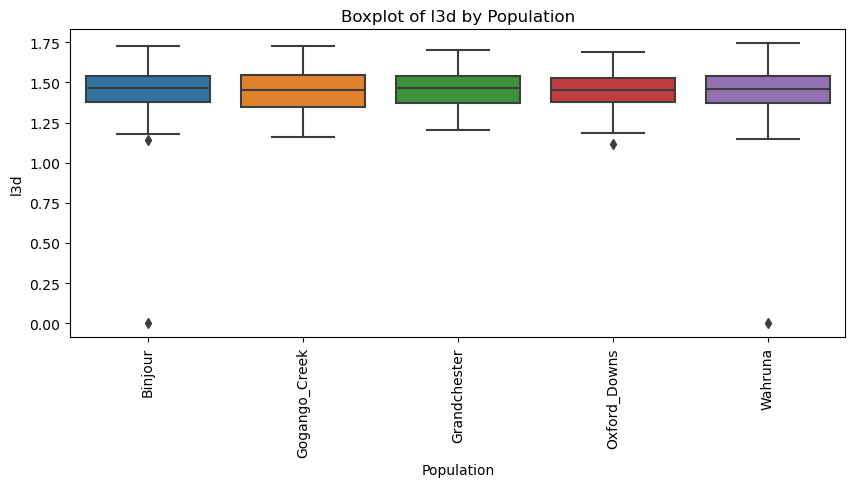

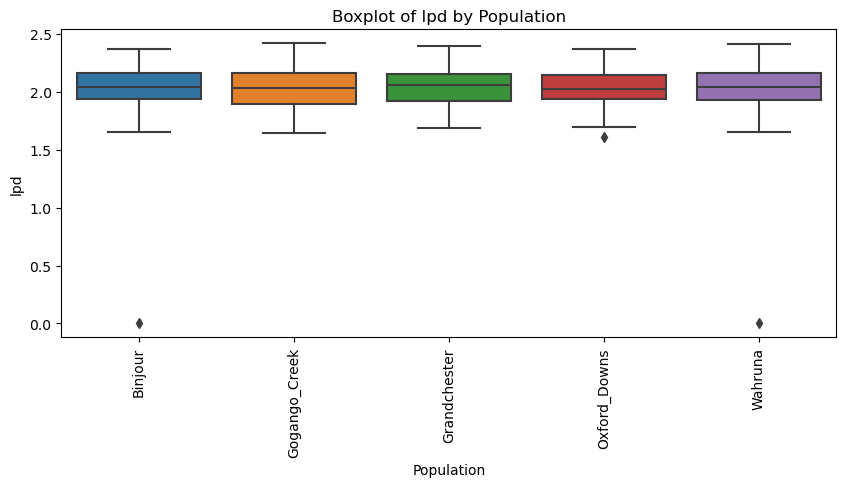

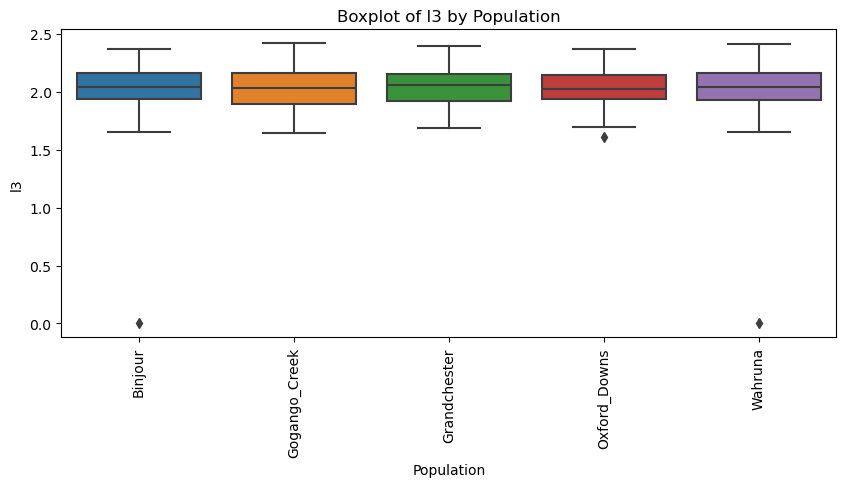

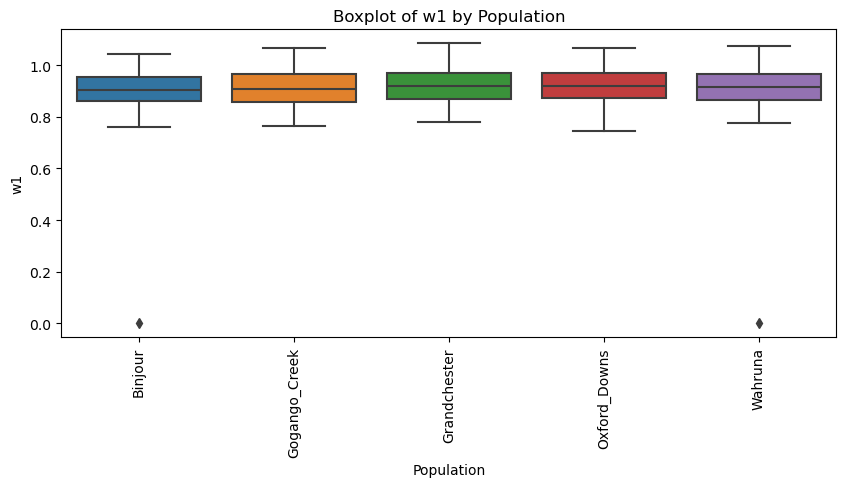

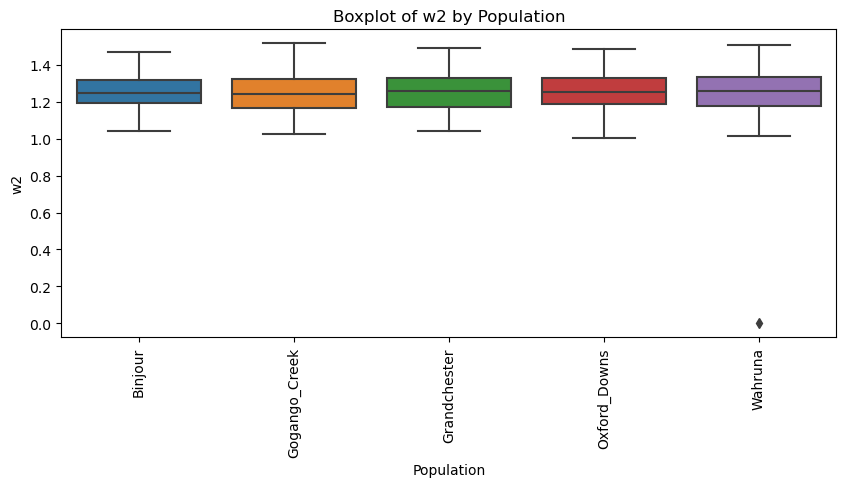

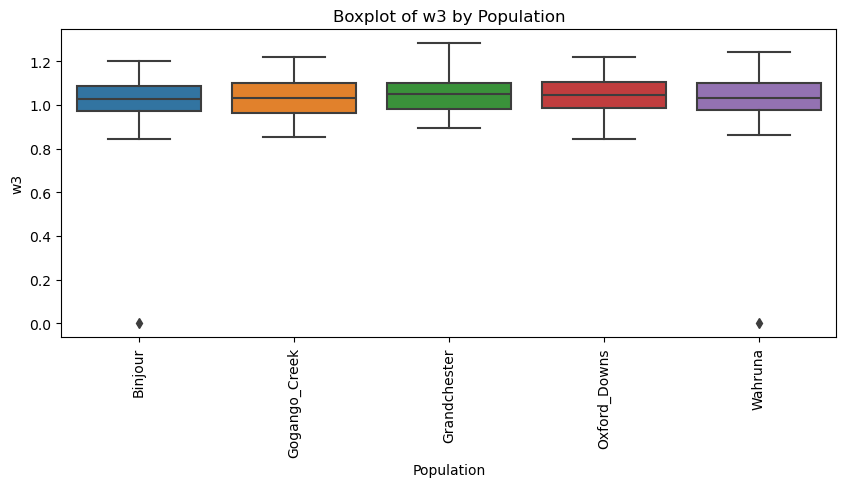

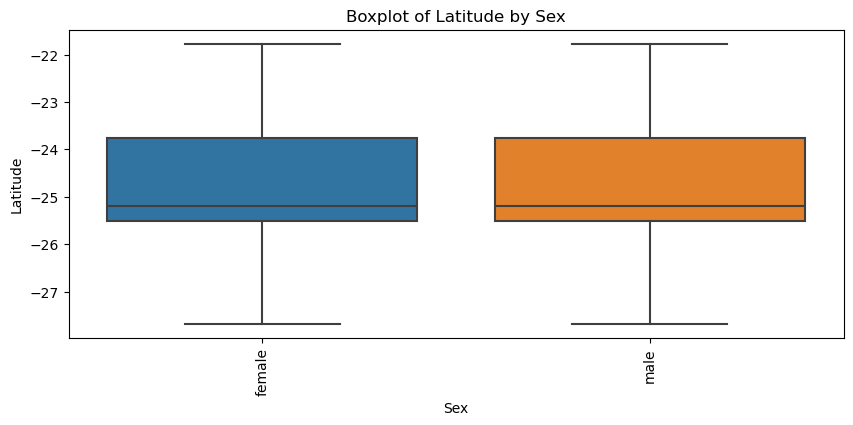

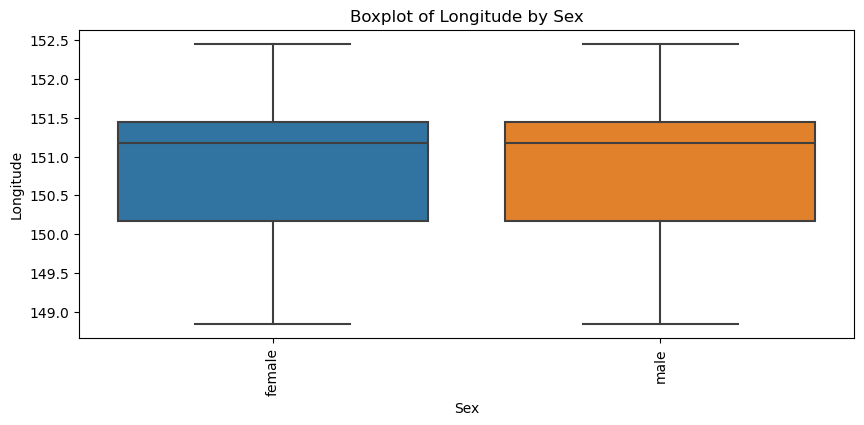

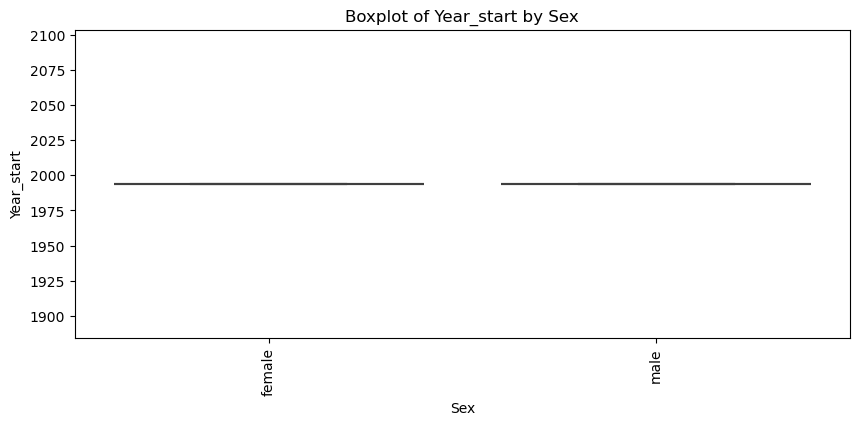

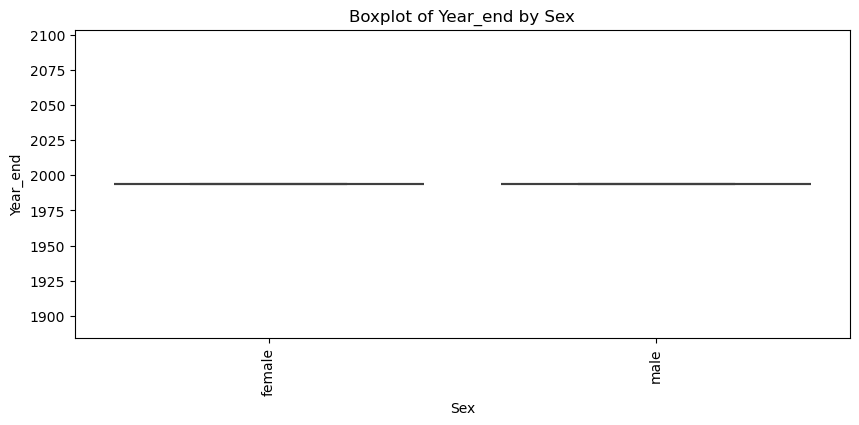

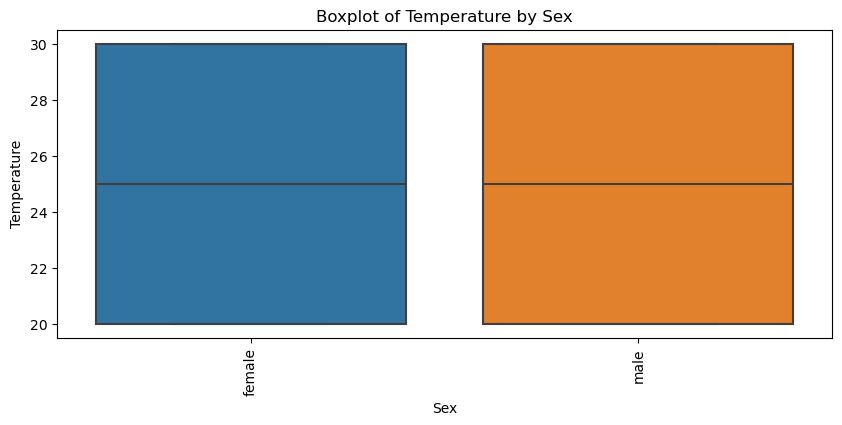

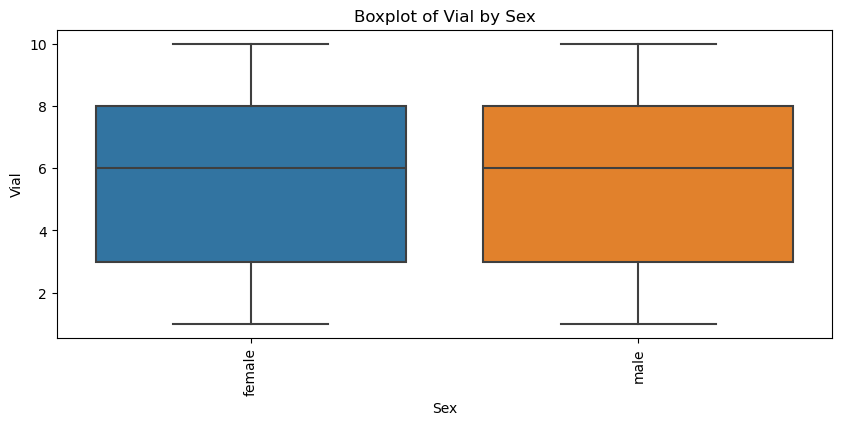

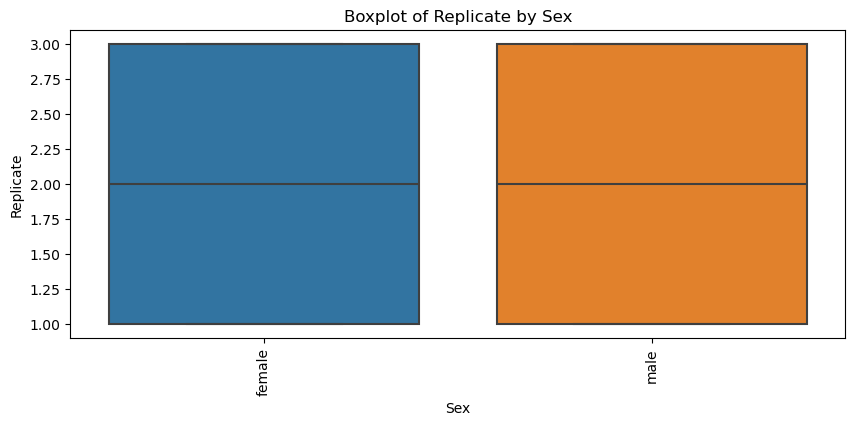

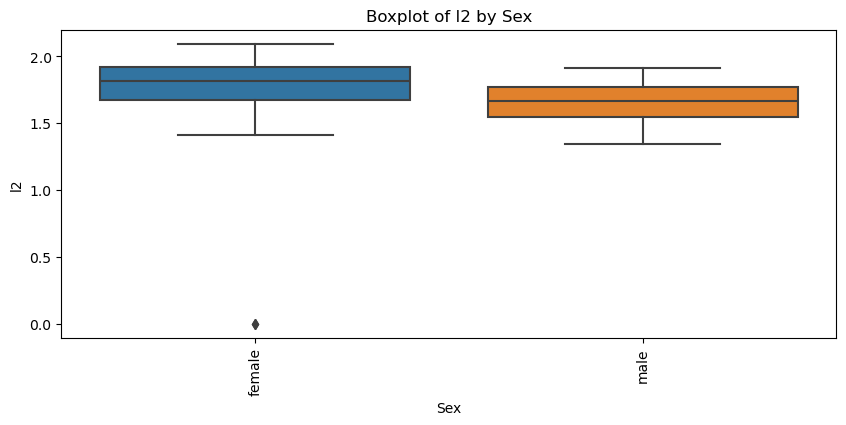

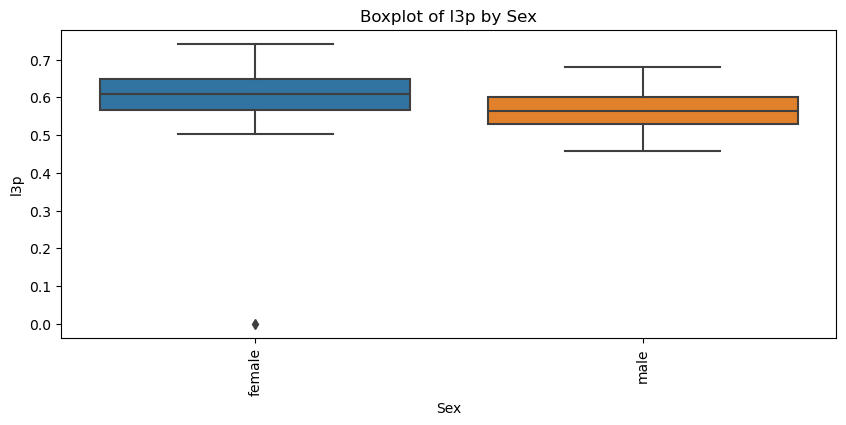

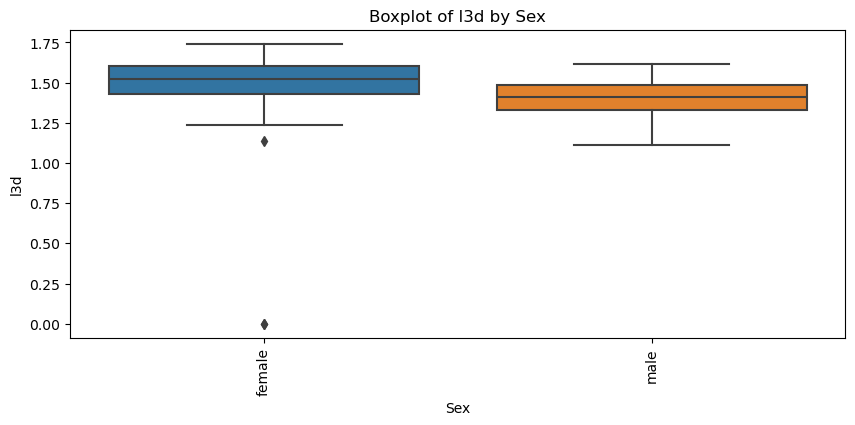

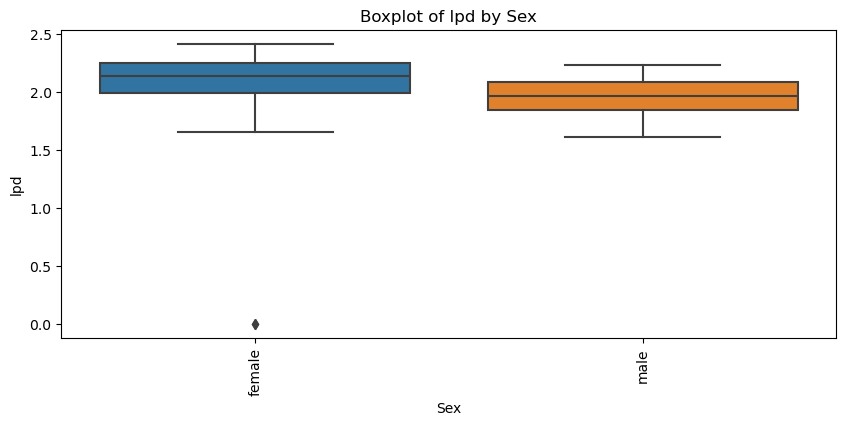

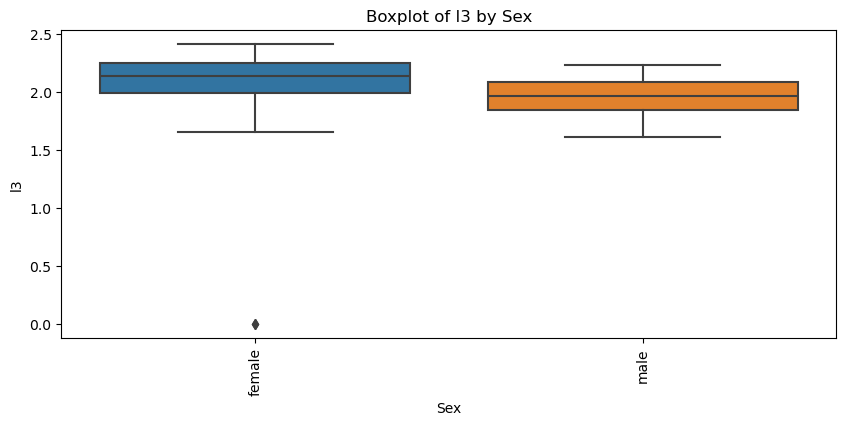

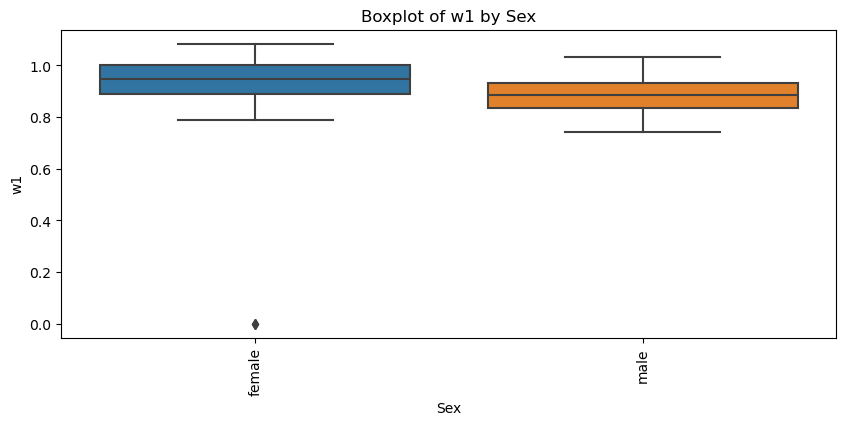

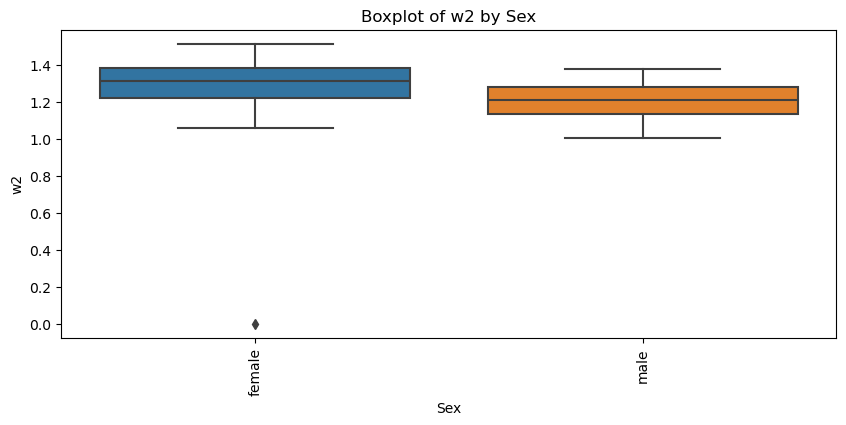

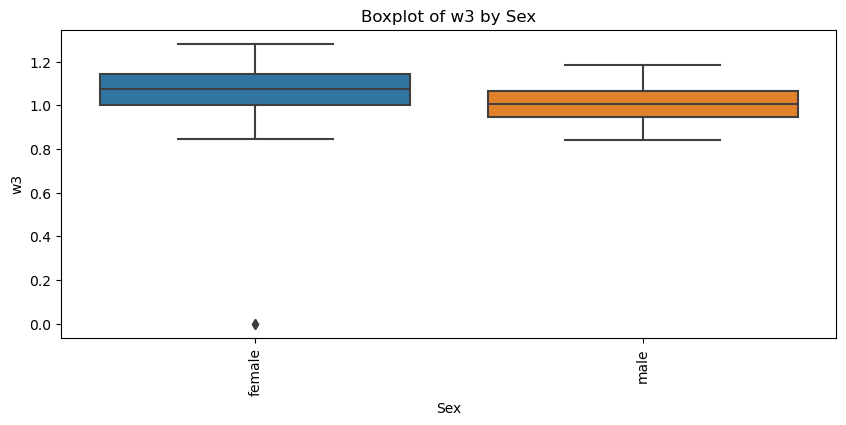

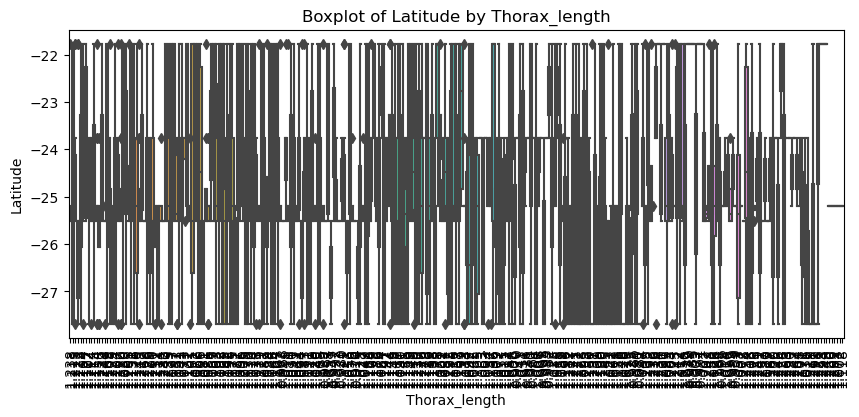

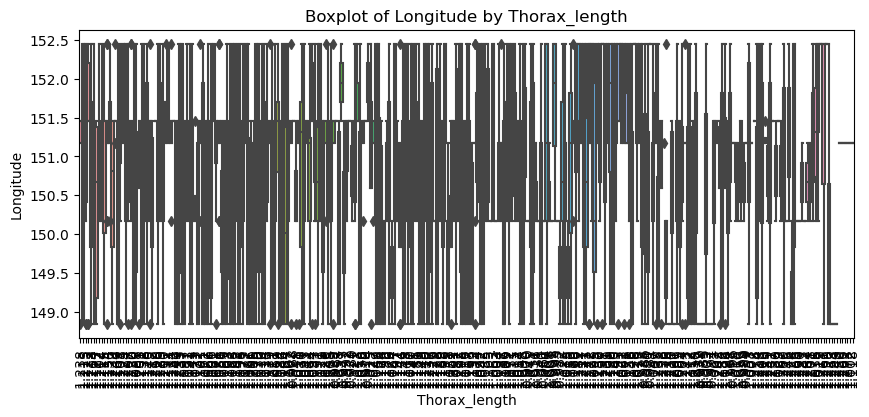

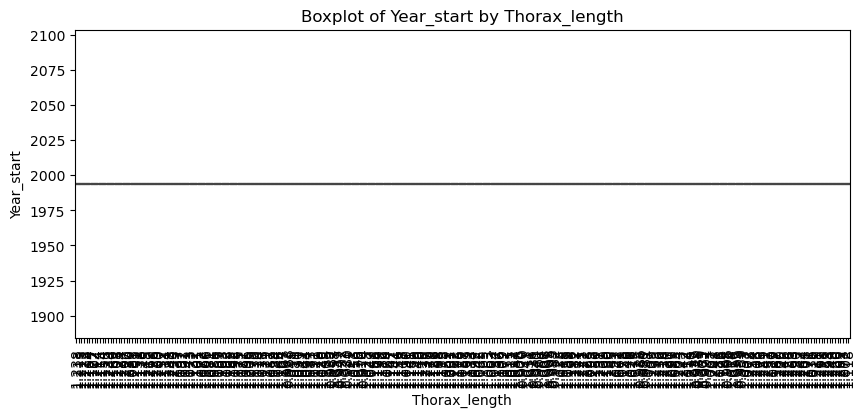

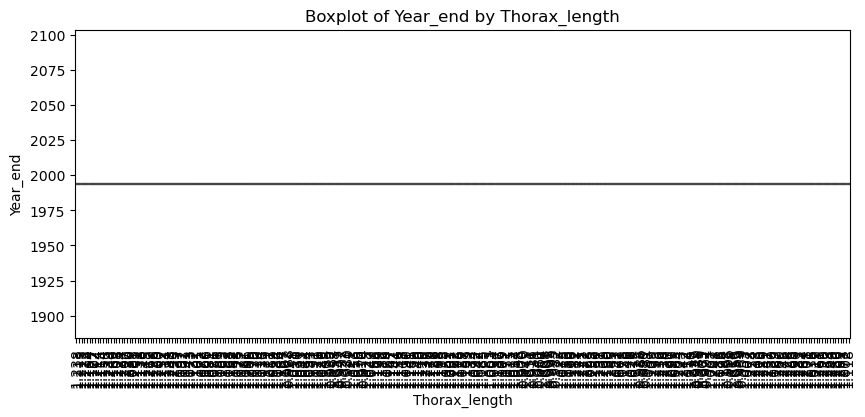

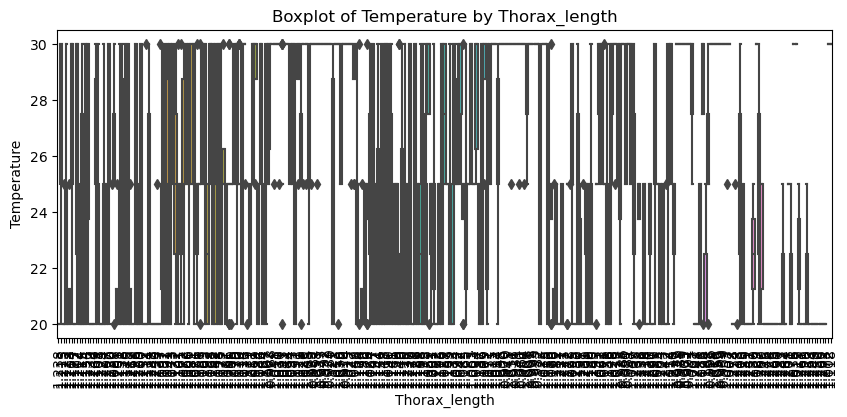

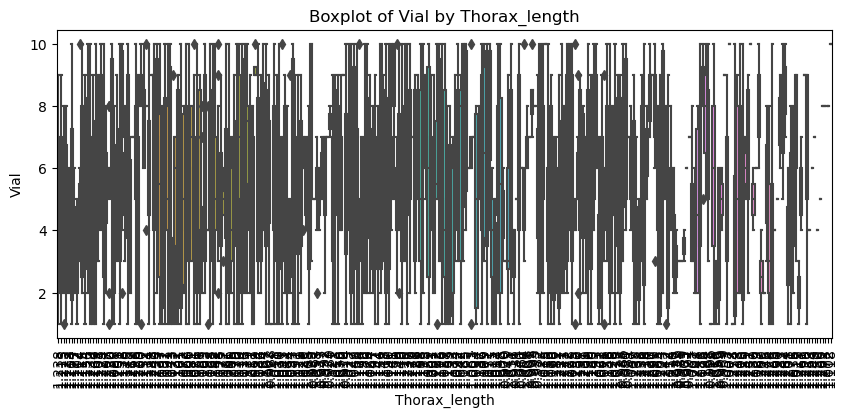

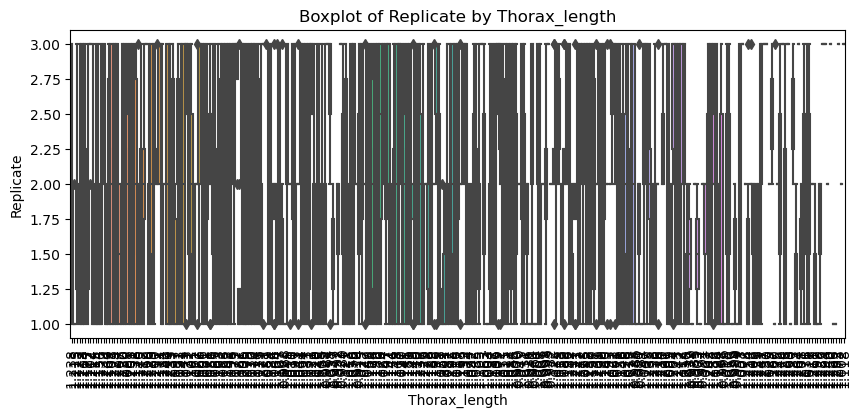

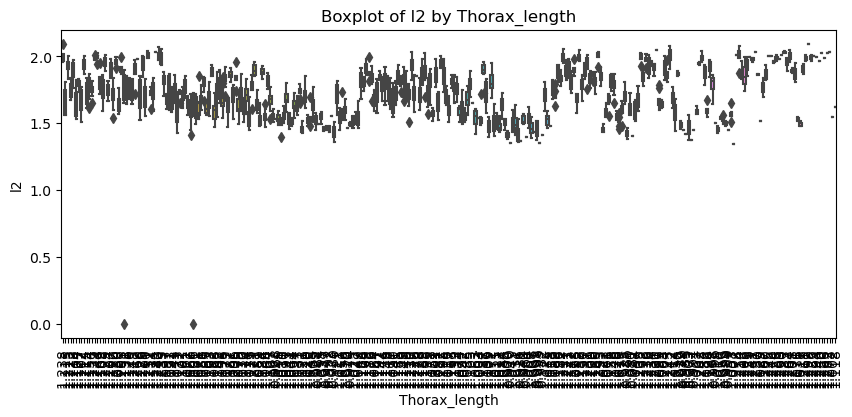

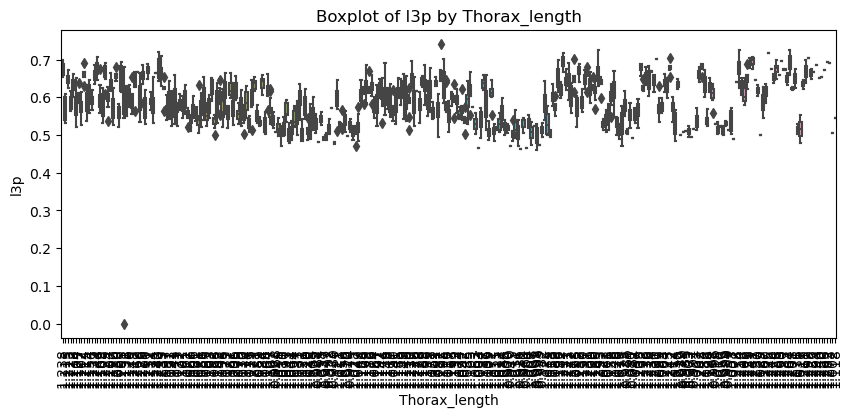

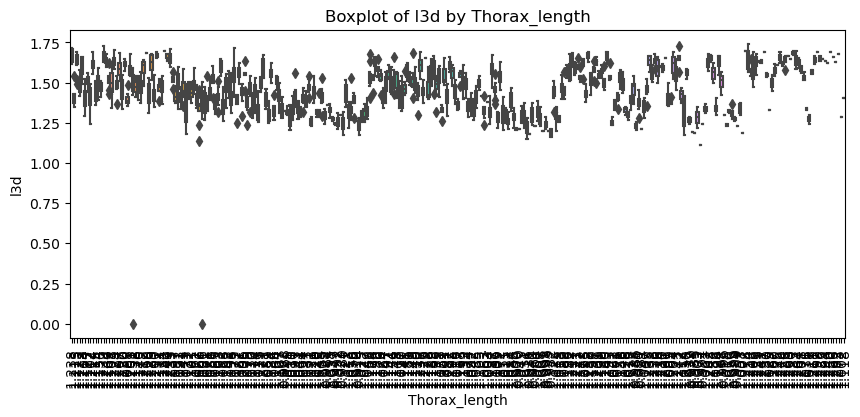

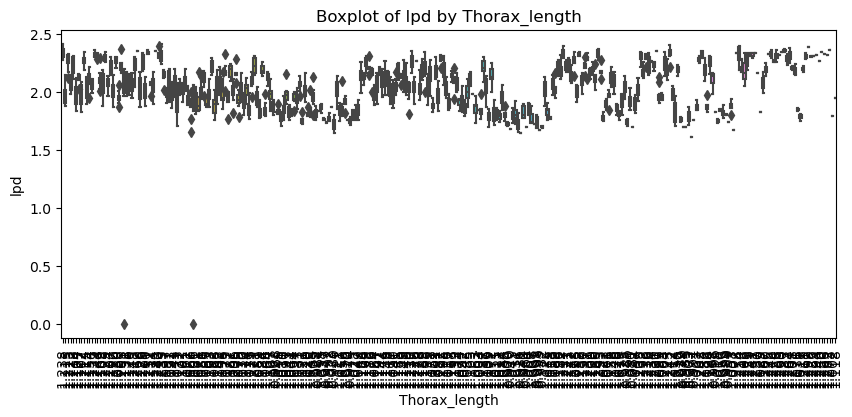

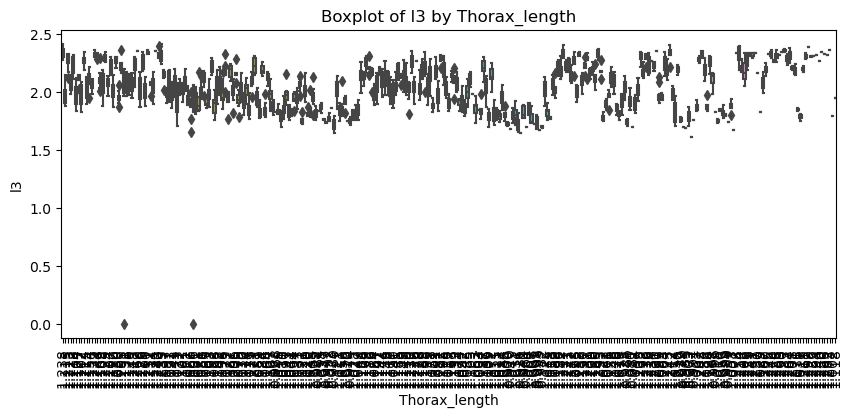

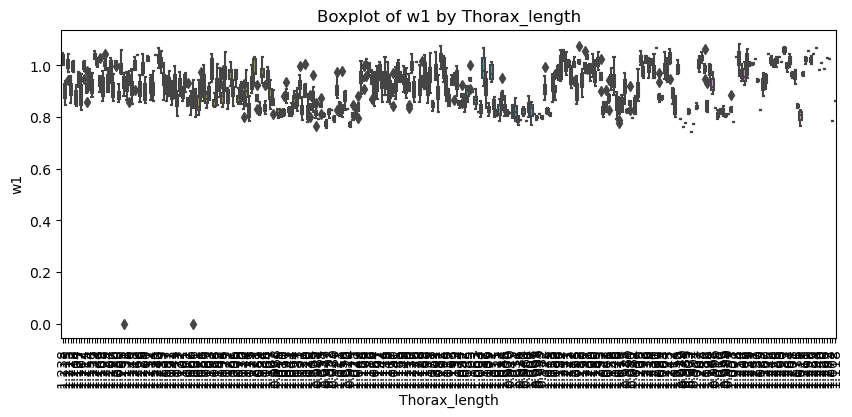

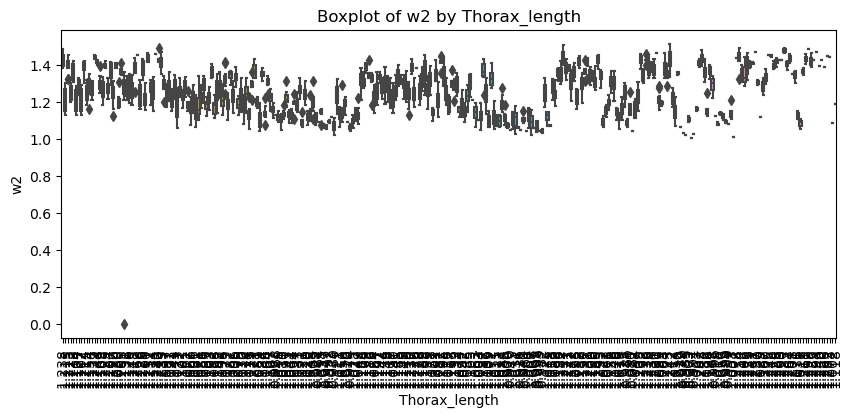

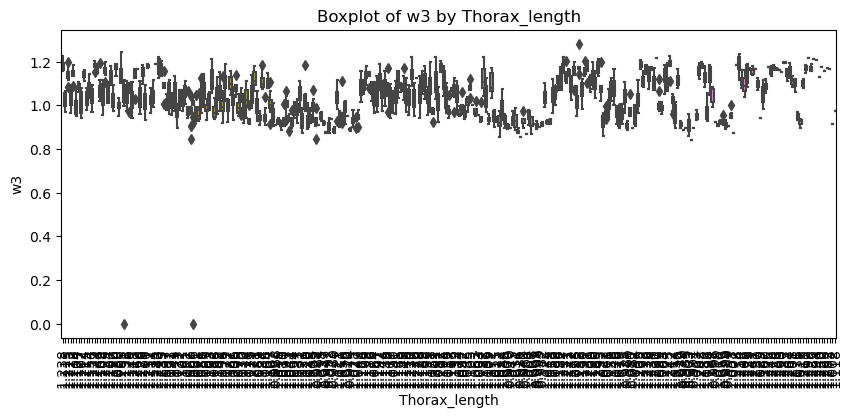

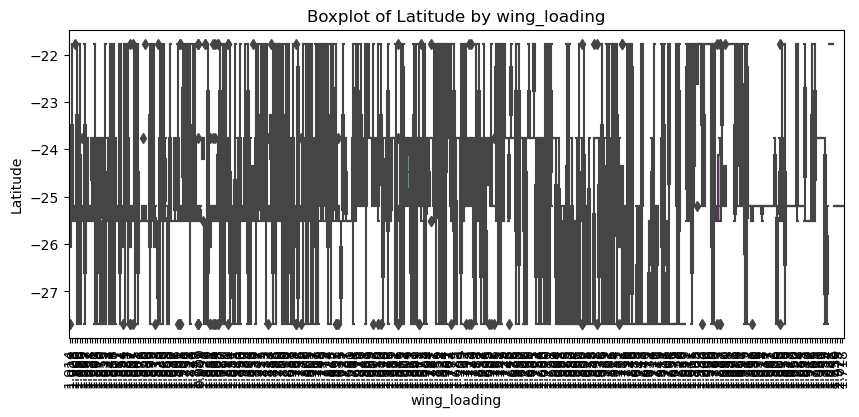

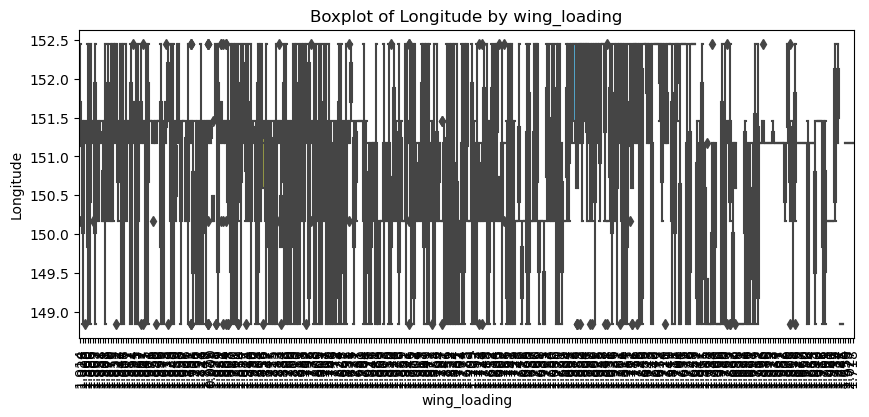

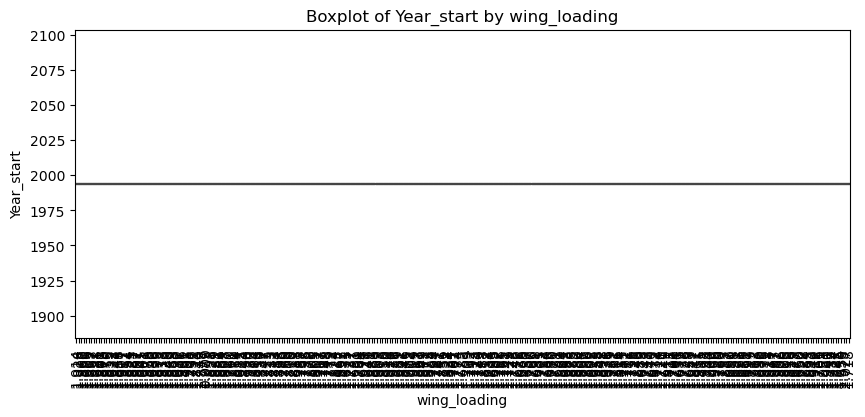

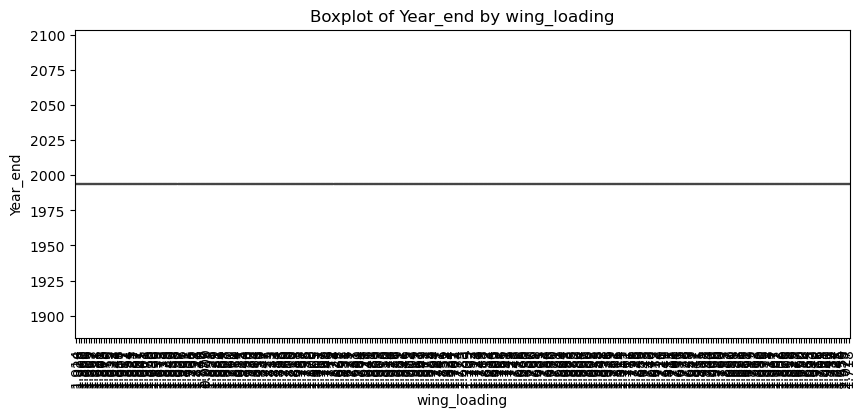

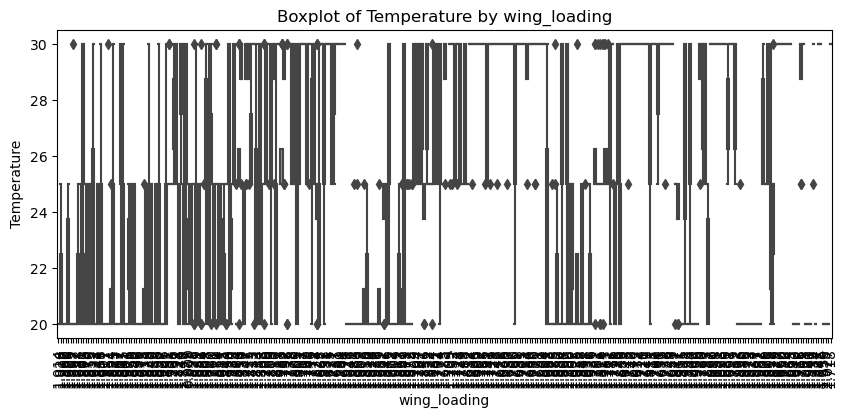

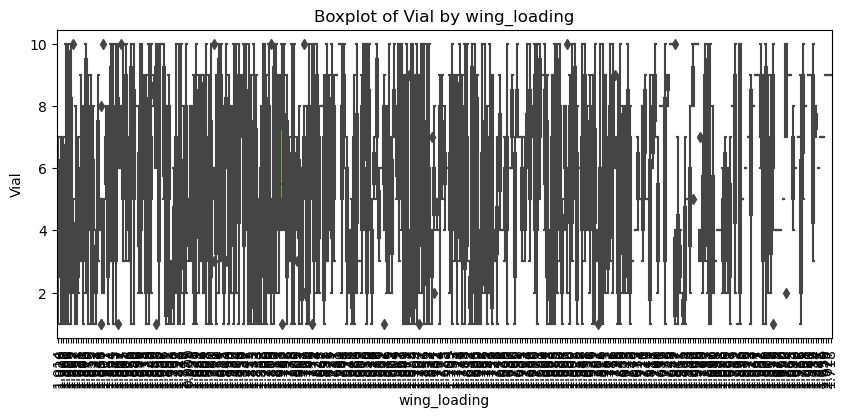

In [7]:
# Boxplot for each categorical feature against each numerical feature
for categ in categorical_features:
    for num_col in df.select_dtypes(include=np.number).columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=categ, y=num_col, data=df)
        plt.title(f'Boxplot of {num_col} by {categ}')
        plt.xticks(rotation=90)
        plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Chi-squared test to examine the relationship between categorical variables
for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 != col2:
            data_crosstab = pd.crosstab(df[col1], df[col2], margins = False)
            stat, p, dof, expected = chi2_contingency(data_crosstab)
            if p < 0.05:
                print(f'Significant association between {col1} and {col2} (p={p:.3f})')